In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brenth
import scipy.integrate as integrate

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
def Ueff(x):
    return 0.5*x**2*(1.-2./(g2*g1**2))+1./g2
def dU(x):
    return x
def dUeff(x):
    return x*(1.-2./(g2*g1**2))

def d2Ueff(x):
    return 1.-2./(g2*g1**2)

def T(x):
    return 1.-(x/g1)**2

def integrand(x):
    return dUeff(x)/T(x)

In [3]:
def root(F, x1, x2, div, it):
    X=np.linspace(x1,x2, div)
    roots=np.array([])
    for i in range(div-1):
        if F(X[i])*F(X[i+1])<=0:
            p1=X[i]
            p2=X[i+1]
            r=brenth(F, p1, p2, maxiter=it)
            roots=np.append(roots, r)
    return roots

In [4]:
def maxmin(dF,d2F, x1, x2, div, it):
    roots=root(dF, x1, x2, div, it)
    Max=np.array([])
    Min=np.array([])
    Infl=np.array([])
    for r in roots:
        if d2F(r)>0: Min=np.append(Min, r)
        if d2F(r)<0: Max=np.append(Max, r)
        if d2F(r)==0: Infl=np.append(Infl, r)
    return Max,Min, Infl

In [5]:
def integral2(F, X):
    l=len(X)
    Func=np.zeros(l)
    id0=int(0.5*l)
    xmin=X[id0]
    Func[id0]=0
    for i in range(1,l):
        if i<=id0:
            x0 = X[id0-i+1]
            x1 = X[id0-i]
            Func[id0-i]=integrate.quad(F, x0, x1)[0]
            Func[id0-i]=Func[id0-i]+Func[id0-i+1]
        else:
            x0 = X[i-1]
            x1 = X[i]
            Func[i]=integrate.quad(F, x0, x1)[0]
            Func[i]=Func[i]+Func[i-1]
    return Func

In [6]:
def evol(x, h):
    e=np.random.normal(0, 1)
    y=x-h*dU(x)/g1+np.sqrt(2*T(x)*h/(g1*g2))*e
    return y

In [7]:
div=100
it=100

## 1er intento ever

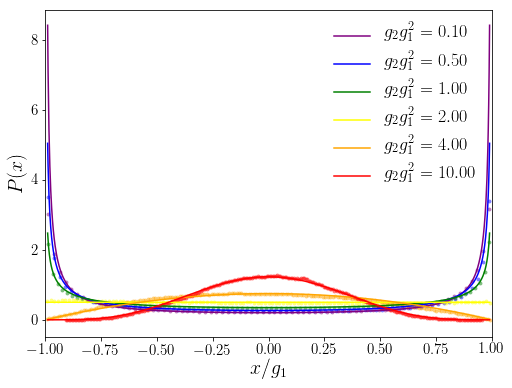

In [8]:
g1=1
G2=np.array([0.1, 0.5, 1.0, 2.0, 4.0, 10.0])
color=['purple', 'blue', 'green','yellow' ,'orange', 'red']
plt.figure(figsize=(8, 6))
for g, co in zip(G2, color):
    g2=g
    Max, Min, Infl=maxmin(dUeff, d2Ueff, -g1, g1, div, it)
    X=np.linspace(-g1*.99, g1*.99, 1000)
    X=np.concatenate((X,Max, Min, Infl), axis=0)
    X=np.sort(X)
    inte=integral2(integrand, X)
    inte=-g2*inte
    prob=np.exp(inte)
    prob[prob==np.nan]=0
    Z=np.trapz(prob, X)
    plt.plot(X, prob/Z, color=co, label=r'$g_2g_1^2=%.2f$'%g2*g1**2)
    
    it=2000000
    l=int(0.99*it)
    h=1e-3
    x=np.zeros(it)
    value=g2*g1**2
    x[0]=np.random.uniform(-g1,g1)
    for i in range(1,it):
        x[i]=evol(x[i-1],h)
        if x[i]>g1 or x[i]<-g1:
            x[i]=x[i-1]
    counts,bin_edges = np.histogram(x[-l:], 'fd', density=1)
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
    plt.scatter(bin_centres, counts,c=co, lw=0, s=15, alpha=0.5)#, label=r'$g_2g_1^2=%.2f$'%value, alpha=0.5)
    plt.xlim([-g1,g1])
    
    
plt.legend(loc='best', frameon=0, fontsize=18)
plt.xlabel('$x/g_1$', fontsize=20)
plt.ylabel('$P(x)$', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('harmonic_analitic_langevin.png', bbox_inches='tight')
plt.show()
plt.close()